<a href="https://colab.research.google.com/github/VedantBatham/Telco_Churn_Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telco Churn Prediction**

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###*Reading the csv file*

In [2]:
df=pd.read_csv(r'/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info() #to check missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##**Data Preprocessing**

In [6]:
df.drop('customerID',axis=1,inplace=True) # Will not be used for prediciton

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') #Convert Object to float

In [8]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
numerical_features=['TotalCharges','MonthlyCharges','tenure']
categorical_featues=[]
for col in df.columns:
  if col not in numerical_features:
    categorical_featues.append(col)
    print(col, "-",df[col].unique())

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


In [11]:
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})
df['OnlineSecurity']=df['OnlineSecurity'].replace({'No internet service':'No'})
df['OnlineBackup']=df['OnlineBackup'].replace({'No internet service':'No'})
df['DeviceProtection']=df['DeviceProtection'].replace({'No internet service':'No'})
df['TechSupport']=df['TechSupport'].replace({'No internet service':'No'})
df['StreamingTV']=df['StreamingMovies'].replace({'No internet service':'No'})
df['StreamingMovies']=df['StreamingMovies'].replace({'No internet service':'No'})

In [12]:
numerical_features=['TotalCharges','MonthlyCharges','tenure']
categorical_featues=[]
for col in df.columns:
  if col not in numerical_features:
    categorical_featues.append(col)
    print(col, "-",df[col].unique())

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


<Axes: xlabel='Churn', ylabel='count'>

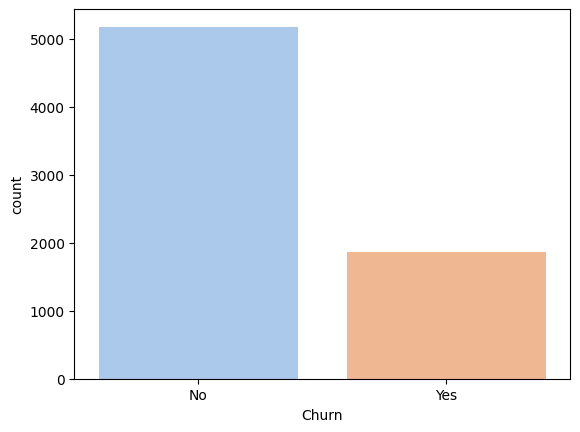

In [13]:
sns.countplot(data=df,x='Churn',hue='Churn',palette='pastel')

In [14]:
multi_category=['PaymentMethod','Contract','InternetService']
binary_category=[]
for col in categorical_featues:
  if col not in multi_category and col!='SeniorCitizen':
    binary_category.append(col)

###*Data Encoding*

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Label enocding for binary features
for col in binary_category:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

#One Hot Encoding for multi category features
df = pd.get_dummies(df, columns=multi_category, drop_first=True)

In [16]:
#Independent features
X=df.drop('Churn',axis=1)

#Dependent feature
y=df['Churn']

###*Handling Imbalanced Dataset*

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({0: 5174, 1: 1869})
After SMOTE: Counter({0: 5174, 1: 5174})


###*Feature Scaling*

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_res)

###*Applying PCA*

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)    #Keeps 95% of variance
X_pca=pca.fit_transform(X_scaled)

##**Model Selection**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y_res,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
models={
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest Classifier':RandomForestClassifier(n_estimators=200,random_state=42),
    'XGBoost Classifier':XGBClassifier(eval_metric='logloss', random_state=42)
}

In [22]:
for model in models.keys():
  meta_model=models[model]
  meta_model.fit(X_train,y_train)
  y_predict=meta_model.predict(X_test)
  print(f"{model} :")
  print("Accuracy Score : ",accuracy_score(y_test,y_predict))
  print("Precision : ",precision_score(y_test,y_predict))
  print("Recall : ",recall_score(y_test,y_predict))
  print("f1 score : ",f1_score(y_test,y_predict))
  print()
  print()

Logistic Regression :
Accuracy Score :  0.8101449275362319
Precision :  0.8031423290203327
Recall :  0.8284080076263107
f1 score :  0.8155795401220084


Random Forest Classifier :
Accuracy Score :  0.8304347826086956
Precision :  0.849
Recall :  0.8093422306959008
f1 score :  0.828696925329429


XGBoost Classifier :
Accuracy Score :  0.8294685990338164
Precision :  0.8314285714285714
Recall :  0.8322211630123928
f1 score :  0.8318246784182944




##**Hyperparameter Tuning**

In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC-AUC: 0.9024285053132342


##**Training Best model**

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Best parameters from GridSearchCV
best_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Create final model
final_model = XGBClassifier(**best_params)

final_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

y_pred = final_model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Final ROC-AUC on Test Set:", roc_auc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Final ROC-AUC on Test Set: 0.9145793437899441
Confusion Matrix:
 [[834 187]
 [169 880]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1021
           1       0.82      0.84      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



##**Saving the model**

In [25]:
import pickle

# Save the model
with open('xgb_telco_churn_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)